In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

In [8]:
from fonction import *

In [9]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\mesh_unstructured_C\\data_set_C_3_p4.csv'

In [10]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(143282, 61)

In [11]:
X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data)

In [12]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (114625, 60)
 the size of X_test is  (28657, 60)
 the size of Y_train is  (114625, 1)
 the size of Y_test is  (28657, 1)


In [13]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(60,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00209: early stopping
MSE Train: 0.684 | MSE Test: 0.690


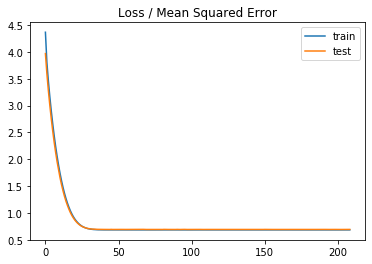

Training time is : 0.36  minute
======================Saving model==========================
Saved model to disk


In [14]:
model_base, train_mse , test_mse = training_NN(build_model_base_line,X_train, X_test, Y_train, Y_test,"model_bl_data_C_3_p4.h5",batch=1000)

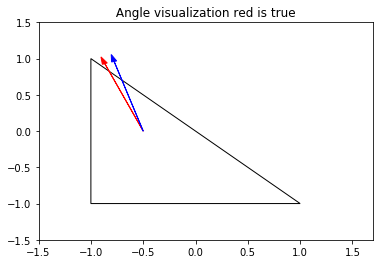

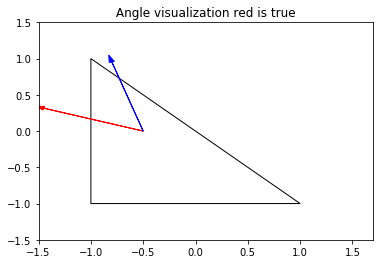

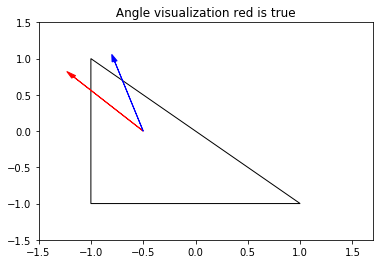

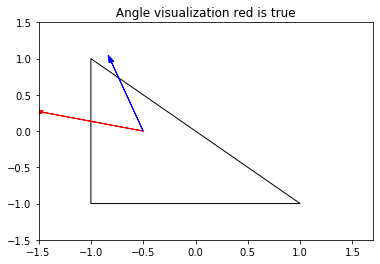

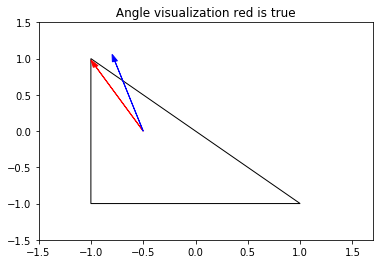

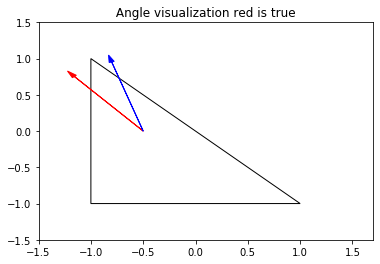

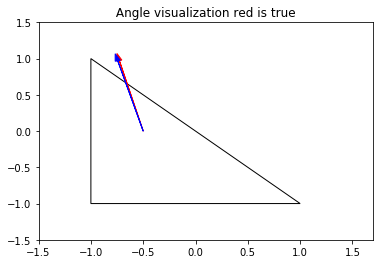

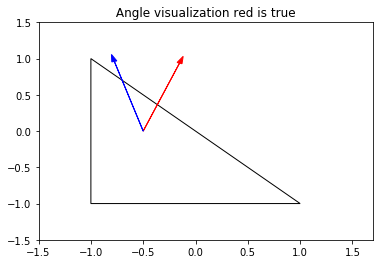

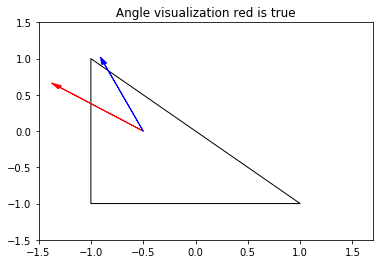

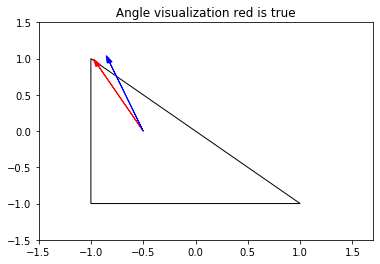

In [15]:
angle_visualization(model_base , X_test , Y_test)

In [16]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(40 ,input_shape=(60,),activation = 'tanh'))
    model.add(Dense(40,activation = 'tanh'))
    model.add(Dense(30,activation = 'tanh'))
    model.add(Dense(20,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________
None
=======================training=====================

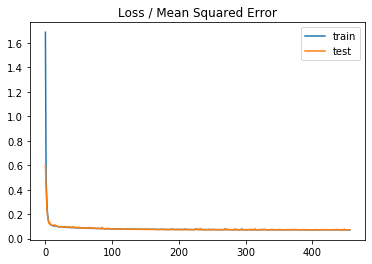

Training time is : 1.34  minute
======================Saving model==========================
Saved model to disk


In [17]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,"model_3_tanh_data_C_3_p4.h5",batch = 1000)

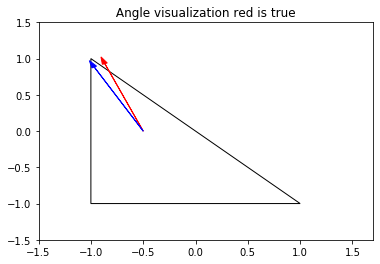

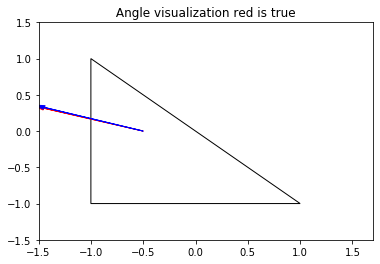

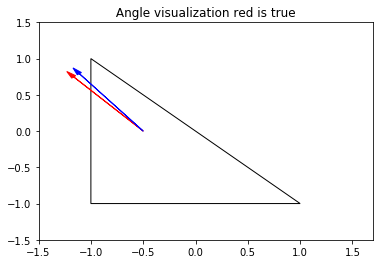

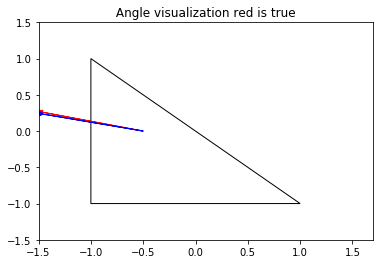

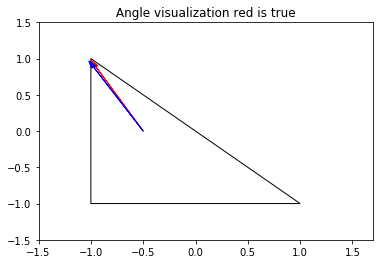

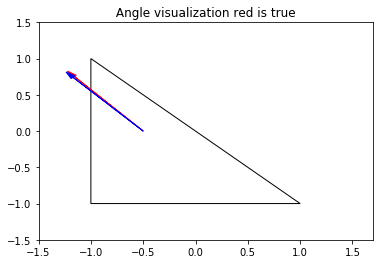

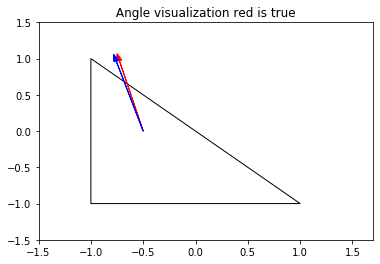

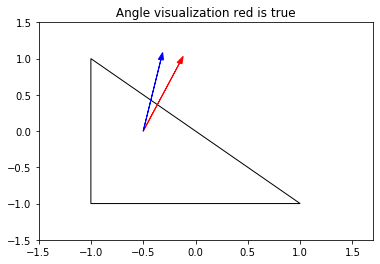

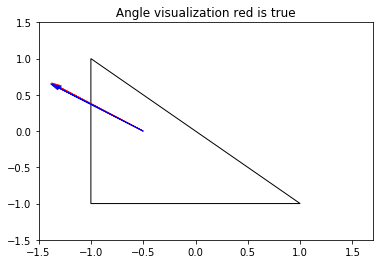

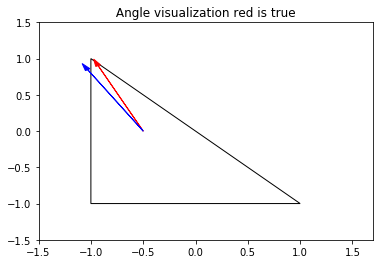

In [19]:
angle_visualization(model_3_tanh , X_test , Y_test)

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        1.     , -0.66665, -0.66665, -0.66665,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        1.     ,  1.     , -0.66665, -0.66665,  1.     ,  1.     ,
       -0.66665, -0.66665,  1.     , -0.66665, -0.66665, -0.66665,
        1.     ,  1.     , -0.66665, -0.66665, -0.66665, -0.66665,
       -0.66665, -0.66665, -0.66665, -0.66665])

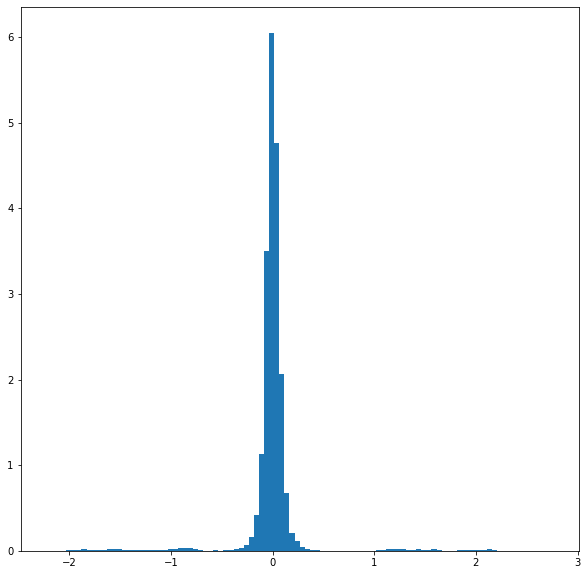

In [27]:
Y_hat =  model_3_tanh.predict(X_test, verbose=0)
distribution = Y_hat-Y_test
plt.figure(figsize=(10,10))
plt.hist(distribution,density = True , bins = 100)
plt.show()

In [28]:
test = np.unique(X_test[1,:])
count = np.shape(np.where(X_test[1,:]==test[1])[0])[0]
print(count)

40


In [29]:
def get_info(X_test,Y_test):
    tmp = []
    n = np.shape(X_test)[0]
    m = np.shape(X_test)[1]
    for i in range(n):
        unique = np.unique(X_test[i,:])
        count1 = np.shape(np.where(X_test[i,:]==unique[0])[0])[0]
        count2 = np.shape(np.where(X_test[i,:]==unique[1])[0])[0]
        diff = np.abs(count1-count2)
        tmp.append(diff)
    return np.asarray(tmp)

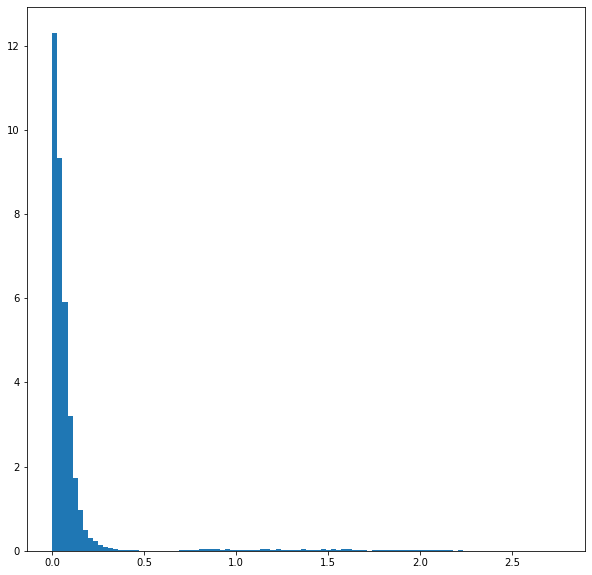

In [30]:
plt.figure(figsize=(10,10))
plt.hist(np.abs(distribution),density = True , bins = 100)
plt.show()

In [42]:
vect_diff = get_info(X_test,Y_test)
index_bad = np.where(np.abs(distribution)>1)[0]
index_good =  np.where(np.abs(distribution)<=0.1)[0]
mean_bad = np.max(vect_diff[index_bad])
mean_good = np.max(vect_diff[index_good])
print(" mean is ",np.mean(vect_diff))
print(" mean bad is ",mean_bad)
print(" mean good is ",mean_good)
print(vect_diff)

 mean is  13.785693662480151
 mean bad is  26
 mean good is  34
[ 0 26  6 ...  0  8 26]


In [45]:
np.var(distribution)

0.0951794750931038

### Making prediction :

In [3]:
from keras.models import load_model
model_3_tanh = load_model('model_3_tanh_data_6.h5')

In [23]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_unstructured\\data_test_set_C_p4_3_30.csv'
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_C_p4_3_30.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0415
saving prediction ...
saving succed


In [24]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_unstructured\\data_test_set_C_p4_3_60.csv'
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_C_p4_3_60.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0682
saving prediction ...
saving succed


In [25]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_unstructured\\data_test_set_C_p4_3_90.csv'
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_C_p4_3_90.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.1048
saving prediction ...
saving succed


In [26]:
data_path_test = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_unstructured\\data_test_set_C_p4_3_circle.csv'
test_mse = prediction_on_new_grid(data_path_test,'\data\pred_data_set_C_p4_3_circle.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:23: RuntimeWarning: invalid value encountered in less
  indice_neg = np.where(data[:,-1]<0)[0]
